### Sales Data Analysis

#### In this project we will be answering the questions on sales data which will help in the growth of store. 

In [1]:
# Import necessary libraries
import pandas as pd
import os 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('all.csv')

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaninig up the data

In [5]:
# Droping NaN rows
nan_df=df[df.isna().any(axis=1)]
nan_df.head()
df=df.dropna(how='all')

In [6]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
df2=df[df['Order Date'].str[0:2]!='Or']
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
df2['Quantity Ordered']=pd.to_numeric(df2['Quantity Ordered'])
df2['Price Each']=pd.to_numeric(df2['Price Each'])
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Argumented data with additional columns

Adding Month Column

In [9]:
df2['Months']=df2['Order Date'].str[0:2]
df2['Months']=df2['Months'].astype('int')
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Adding sales column

In [10]:
df2['Sales']=df2['Quantity Ordered']*df2['Price Each']
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Adding City column

In [11]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(" ")[1]


df2['City']=df2['Purchase Address'].apply(lambda x: get_city(x)+' (' +get_state(x)+')' )
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### What was the best month for sales? How much was earned that month?

In [12]:
results=df2.groupby('Months').sum()
results

,Quantity Ordered,Price Each,Sales
Months,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


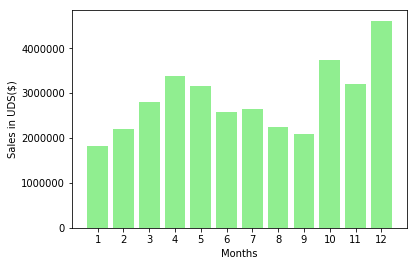

In [14]:
import matplotlib.pyplot as plt
month=range(1,13)
plt.xticks(month)
plt.xlabel("Months")
plt.ylabel("Sales in UDS($)")
plt.bar(month,results['Sales'],color='lightgreen')
plt.show()

### Which city has highest number of sales

In [15]:
results_city=df2.groupby('City')['Sales', 'Quantity Ordered'].sum()
results_city

,Sales,Quantity Ordered
City,,
Atlanta (GA),2.795499e+06,16602
Austin (TX),1.819582e+06,11153
Boston (MA),3.661642e+06,22528
Dallas (TX),2.767975e+06,16730
Los Angeles (CA),5.452571e+06,33289
New York City (NY),4.664317e+06,27932
Portland (ME),4.497583e+05,2750
Portland (OR),1.870732e+06,11303
San Francisco (CA),8.262204e+06,50239


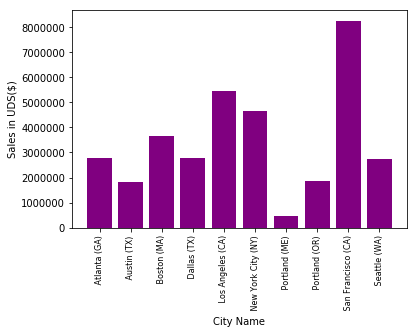

In [16]:
import matplotlib.pyplot as plt
cities=[city for city , df4 in df2.groupby('City')]
plt.bar(cities,results_city['Sales'],color='purple')
plt.xticks(cities,rotation='vertical',size=8)
plt.xlabel("City Name")
plt.ylabel("Sales in UDS($)")

plt.show()

### What time we should display the advertisements to maximize likelihood of our customer buying product

In [17]:
df2['Order Date'] = pd.to_datetime(df2['Order Date'])

In [18]:
df2['Hour']=df2['Order Date'].dt.hour
df2['Minute']=df2['Order Date'].dt.minute
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


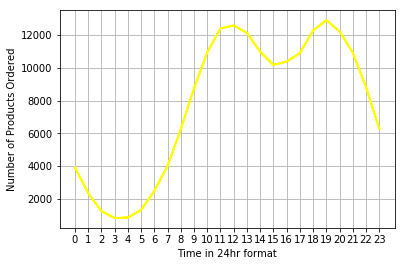

In [19]:
hours=[hour for hour , df4 in df2.groupby('Hour')]
plt.plot(hours,df2.groupby(['Hour']).count(),color='yellow')
plt.xticks(hours)
plt.grid()
plt.xlabel('Time in 24hr format')
plt.ylabel('Number of Products Ordered')
plt.show()


#My Recomendation is around 10am and 6pm 

### What products are are most often sold together?

In [20]:
df3=df2[df['Order ID'].duplicated(keep=False)]
df3['Grouped Products']=df.groupby('Order ID')['Product'].transform(lambda x : ' , '.join(x))
df3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Hour,Minute,Grouped Products
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone , Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone , Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone , USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone , USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones , Bose SoundSport H..."


In [21]:
df3=df3[['Order ID','Grouped Products']].drop_duplicates()
df3.head()

,Order ID,Grouped Products
3,176560,"Google Phone , Wired Headphones"
18,176574,"Google Phone , USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones , Bose SoundSport H..."
32,176586,"AAA Batteries (4-pack) , Google Phone"
119,176672,"Lightning Charging Cable , USB-C Charging Cable"


In [22]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df3['Grouped Products']:
    row=row.split(' , ')
    count.update(Counter(combinations(row,2)))

    
    
for key,value in count.most_common(10)    :
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product was sold the most and why do you think it sold the most?

In [23]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


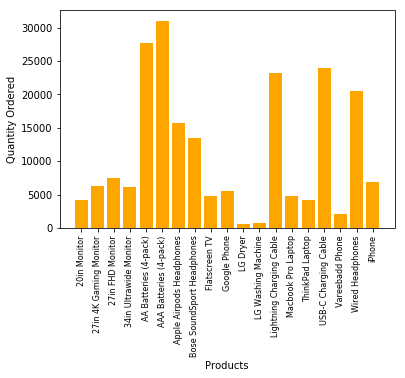

In [24]:
product_group = df2.groupby('Product')
quantity = product_group.sum()["Quantity Ordered"]
products=[product for product , df4 in product_group]
plt.bar(products,quantity,color='orange')
plt.xticks(products,rotation='vertical',size=8)
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")
plt.show()

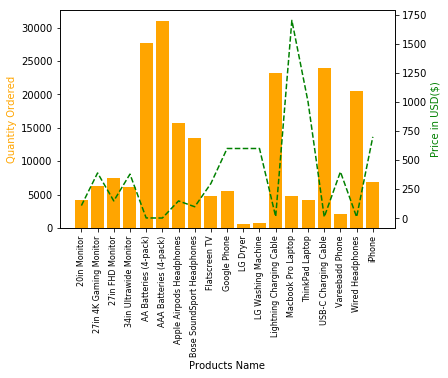

In [25]:
prices=df2.groupby('Product').mean()['Price Each']


fig,ax1 = plt.subplots()

ax2=ax1.twinx()
ax1.bar(products,quantity,color="orange")
ax2.plot(products,prices,'--g')

ax1.set_xlabel("Products Name")
ax1.set_ylabel("Quantity Ordered", color='orange')
ax2.set_ylabel("Price in USD($)" ,color='g')
ax1.set_xticklabels(products,rotation='vertical',size=8)

plt.show()

##            -------------------END OF CODE------------------------

### Insights

The best month for sales was "December" as it was the time for Thanksgiving and Christmas
The city with highest sales was San Fransisco(CA) but Portland(ME) still lacks behind
My recomendation for showing the advertisement is around 10am to 6pm and there should break for the employees around 3pm as the store serves least number of customeers that time
Store placement should be done in such a way that most often bought product should be placed nearby each other eg('iPhone', 'Lightning Charging Cable')